In [1]:
#import Necessary Packages
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import time
import numpy as np

#import CSV containing Gas Prices at Datetime, (obtained from previous program)
df=pd.read_csv('Gas Prices.csv')
print(df.head())

                     datetime  safeLow  average  fast  fastest
0  2021-06-17 00:27:51.975508     15.3     15.3    16       21
1  2021-06-17 17:02:53.047725     17.0     17.0    38       40
2  2021-06-17 17:02:54.629253     17.0     17.0    38       40
3  2021-06-17 18:02:55.955438     13.0     13.0    28       29
4  2021-06-17 19:02:28.719364      1.0      1.0    27       29


   hour  cost
0     0  15.3
1    17  17.0
2    17  17.0
3    18  13.0
4    19   1.0


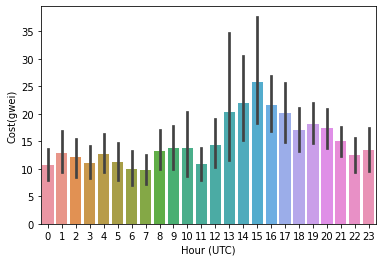

In [2]:
#trim and modify df to plot gas price/hour

#convert datetime column values to strptime
def timed(x):
    return datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f")
df['datetime']=df.datetime.apply(timed)

#grab hour out of DateTime
df1=df
def houred(x):
    return x.hour
df1['datetime']=df.datetime.apply(houred)

#rename columns
df1.rename(columns={'datetime': 'hour', 'average': 'cost'}, inplace=True)

#drop unnecessary gas values
df1=df1.drop(columns=['safeLow','fast','fastest'])
print(df1.head())

#barplot DataFrame
sns.barplot(data=df1, x='hour', y='cost')
plt.ylabel('Cost(gwei)')
plt.xlabel('Hour (UTC)')
plt.show()

In [3]:
#create Easily readable Hour:Cost DataFrame
df2=pd.DataFrame()

for hour in range(24):
    df2[str(hour)]=pd.Series((df.groupby('hour').get_group(hour)['cost'].values).tolist())
    df2.reset_index()
print(df2.head())

      0    1    2     3     4     5    6     7     8     9  ...     14     15  \
0  15.3  9.0  6.0   9.0   6.0   7.0  6.0   6.0   1.0   7.0  ...   14.0   18.0   
1   6.0  6.0  6.0   7.0   8.0  10.0  6.0   6.0   6.0   6.0  ...    9.0   10.0   
2  10.0  5.0  6.0   5.0   5.0   5.0  5.0   1.0   5.0   5.0  ...   10.0   14.0   
3   6.0  5.0  4.0  11.0  11.0  27.0  9.0   1.0  50.0  31.0  ...   34.0   24.0   
4   5.0  9.0  6.0  24.0  12.0  11.0  8.0  12.0  14.0   9.0  ...  128.0  158.0   

     16    17    18    19    20    21    22    23  
0  25.0  17.0  13.0   1.0  18.0  10.0  10.0  0.03  
1  21.0  17.0   7.0  24.0  27.0  21.0  10.0  7.00  
2   7.0  10.0   9.0   6.0   6.0   8.0   9.0  7.00  
3  15.0  10.0   5.0   5.0  35.0  10.0   6.0  5.00  
4  49.0   8.0   6.0  21.0  20.0  18.0   6.0  8.00  

[5 rows x 24 columns]


In [4]:
#create Mean and Median Dictionaries at Hour H
medianDict={}
for hour in range(24):
    medianDict[str(hour)]=df2[str(hour)].median()
meanDict={}
for hour in range(24):
        meanDict[str(hour)]=df2[str(hour)].mean()
print(str(medianDict)+'\n'+str(meanDict))

{'0': 7.0, '1': 8.5, '2': 7.0, '3': 9.0, '4': 8.0, '5': 7.0, '6': 6.0, '7': 6.0, '8': 9.0, '9': 9.0, '10': 9.0, '11': 6.0, '12': 9.0, '13': 10.0, '14': 14.0, '15': 19.0, '16': 19.0, '17': 13.0, '18': 13.0, '19': 16.0, '20': 16.0, '21': 14.0, '22': 10.0, '23': 10.0}
{'0': 10.715925925925928, '1': 12.923076923076923, '2': 12.11111111111111, '3': 10.593703703703703, '4': 11.112222222222222, '5': 10.112222222222222, '6': 8.632962962962964, '7': 8.666666666666666, '8': 12.296296296296296, '9': 12.704814814814814, '10': 13.854074074074074, '11': 9.851851851851851, '12': 13.925925925925926, '13': 20.150370370370368, '14': 21.00111111111111, '15': 24.48148148148148, '16': 20.038148148148146, '17': 17.25925925925926, '18': 16.59259259259259, '19': 16.703703703703702, '20': 16.63074074074074, '21': 14.037037037037036, '22': 12.445555555555554, '23': 13.334444444444443}


        0    1    2    3    4    5    6    7    8    9  ...    14    15    16  \
cost  7.0  8.5  7.0  9.0  8.0  7.0  6.0  6.0  9.0  9.0  ...  14.0  19.0  19.0   

        17    18    19    20    21    22    23  
cost  13.0  13.0  16.0  16.0  14.0  10.0  10.0  

[1 rows x 24 columns]


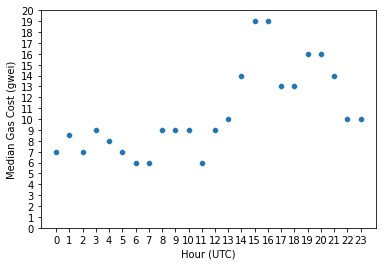

In [5]:
#create DataFrame and Scatterplot Representing Median Gas Prices at Hour H
df3=pd.DataFrame(medianDict, index=['cost'])
print(df3)
df3=df3.T
df3['hour']=list(range(24))
scatMan=sns.scatterplot(data=df3, x='hour', y='cost')
scatMan.set_xticks(range(24))
scatMan.set_yticks(range(int(df3.cost.max()+2)))
plt.xlabel('Hour (UTC)')
plt.ylabel('Median Gas Cost (gwei)')
plt.show()

In [6]:
#create Dataframe that carries Day-Hour-Cost for analysis on gas price at Hour H / Day

#import original(untouched) csv
dfD=pd.read_csv('Gas Prices.csv')

#recycle "timed" function
dfD['datetime']=dfD.datetime.apply(timed)


#recycle "houred" function and create/employ "dayed" function
def dayed(x):
    return x.day
dfD['day']=dfD.datetime.apply(dayed)
dfD['hour']=dfD.datetime.apply(houred)

#rename columns
dfD.rename(columns={'average': 'cost'}, inplace=True)

#drop unnecessary gas values
dfD=dfD.drop(columns=['datetime','safeLow','fast','fastest'])
print(dfD.head())

   cost  day  hour
0  15.3   17     0
1  17.0   17    17
2  17.0   17    17
3  13.0   17    18
4   1.0   17    19


What hour would you like to see data on?
7


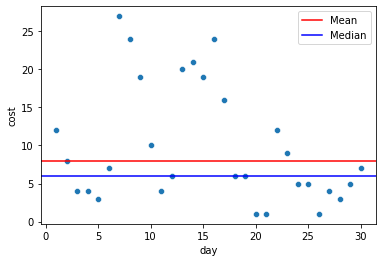

In [7]:
#create Function to plot (gas values by hour) / Day
##day is used purely as a natural way to spread out points

def tempDF(x):
    tdf=dfD.loc[dfD['hour']==x]
    plt.clf()
    sns.scatterplot(data=tdf, x='day', y='cost')
    median=int(medianDict[str(x)])
    mean=int(meanDict[str(x)])
    plt.axhline(y=mean, color='red', label='Mean')
    plt.axhline(y=median, color='blue', label='Median')
    plt.legend()
    plt.show()
x=int(input('What hour would you like to see data on?\n'))
tempDF(x)

What hour would you like to compare data from hour 7 to?
16


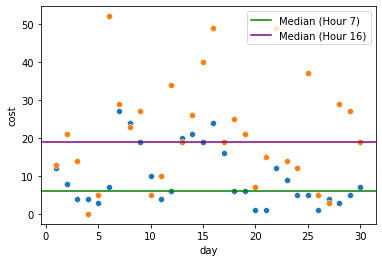

In [12]:
#Function to compare plots of Gas Prices by Hour
def compare(x, y):
    tdf=dfD.loc[dfD['hour']==x]
    plt.clf()
    sns.scatterplot(data=tdf, x='day', y='cost')
    median=int(medianDict[str(x)])
    mean=int(meanDict[str(x)])
#     plt.axhline(y=mean, color='red', label='Mean A')              --possible if needed
    plt.axhline(y=median, color='green', label='Median (Hour '+str(x)+')')

    tdf=dfD.loc[dfD['hour']==y]
    sns.scatterplot(data=tdf, x='day', y='cost')
    median=int(medianDict[str(y)])
    mean=int(meanDict[str(y)])
#     plt.axhline(y=mean, color='green', label='Mean B')             --possible if needed
    plt.axhline(y=median, color='purple', label='Median (Hour '+str(y)+')')
    plt.legend()
    plt.show()
y=int(input('What hour would you like to compare data from hour '+str(x)+' to?\n'))
compare(x,y)